In [19]:
pip install scikit-learn

     ---------------------------------------- 9.2/9.2 MB 5.4 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
with open('done_nan.csv', 'r') as f:
    data = pd.read_csv(f)
data.head()

aerosol  year  month  day  hour  Temp(C)  Prec(mm)  Humidity(%)   
0    102.0  2013      3   19     7      6.4       0.0         99.0  \
1    108.0  2013      3   19     8      7.2       0.0         96.0   
2    100.0  2013      3   19     9      9.1       0.0         90.0   
3     94.0  2013      3   19    10     11.1       0.0         79.0   
4     80.0  2013      3   19    11     12.9       0.0         74.0   

   Dew_Point(C)  Solar_Radiation(MJ/m2)  Snowfall(cm)  3hr_New_Snowfall(cm)   
0           6.2                    0.01           0.0                   0.0  \
1           6.5                    0.24           0.0                   0.0   
2           7.5                    0.73           0.0                   0.0   
3           7.5                    1.34           0.0                   0.0   
4           8.3                    1.82           0.0                   0.0   

   Cloud_Cover(1/10)  Middle_Low_Cloud_Cover(1/10)  Lowest_Cloud_Height(100m)   
0                7.0                           7.0                       10.0  \
1                7.0                           7.0                       10.0   
2                3.0                           3.0                       10.0   
3                0.0                           0.0                       10.0   
4                0.0                           0.0                       10.0   

   Visibility(10m)  30cm_Ground_Temperature(C)      power        d2m   
0            300.0                         9.9     9600.0  281.82224  \
1            300.0                         9.8   816000.0  281.86746   
2            300.0                         9.8  2899200.0  282.04712   
3            400.0                         9.7  5472000.0  282.88538   
4            400.0                         9.7  7401600.0  282.98697   

         t2m                 time  
0  286.23135  2013-03-19 07:00:00  
1  285.86597  2013-03-19 08:00:00  
2  285.64914  2013-03-19 09:00:00  
3  284.99387  2013-03-19 10:00:00  
4  284.90920  2013-03-19 11:00:00

In [5]:
# Get the statistical summary of the dataset
statistical_summary = data.describe()

statistical_summary

aerosol          year         month           day          hour   
count  43698.000000  43698.000000  43698.000000  43698.000000  43698.000000  \
mean      35.192075   2017.590759      6.559293     15.770768     13.176896   
std       27.329309      2.832286      3.230823      8.812660      3.633282   
min        2.000000   2013.000000      1.000000      1.000000      6.000000   
25%       19.000000   2015.000000      4.000000      8.000000     10.000000   
50%       30.000000   2018.000000      7.000000     16.000000     13.000000   
75%       44.854396   2020.000000      9.000000     23.000000     16.000000   
max      980.000000   2022.000000     12.000000     31.000000     20.000000   

            Temp(C)      Prec(mm)   Humidity(%)  Dew_Point(C)   
count  43698.000000  43698.000000  43698.000000  43698.000000  \
mean      16.814804      0.100389     71.619942     11.197061   
std        9.050240      0.848427     17.483412      9.987391   
min      -10.700000      0.000000     13.000000    -16.900000   
25%        9.400000      0.000000     59.000000      2.700000   
50%       18.100000      0.000000     72.000000     12.300000   
75%       24.275000      0.000000     86.000000     19.900000   
max       36.500000     41.600000    100.000000     30.100000   

       Solar_Radiation(MJ/m2)  Snowfall(cm)  3hr_New_Snowfall(cm)   
count            43698.000000  43698.000000          43698.000000  \
mean                 1.120784      0.067969              0.001902   
std                  0.916292      0.785439              0.057623   
min                  0.000000      0.000000              0.000000   
25%                  0.310000      0.000000              0.000000   
50%                  0.910000      0.000000              0.000000   
75%                  1.800000      0.000000              0.000000   
max                  3.720000     33.000000              4.000000   

       Cloud_Cover(1/10)  Middle_Low_Cloud_Cover(1/10)   
count       43698.000000                  43698.000000  \
mean            5.403635                      3.375132   
std             3.674497                      3.384904   
min             0.000000                      0.000000   
25%             2.000000                      0.000000   
50%             6.000000                      3.000000   
75%             9.000000                      6.000000   
max            10.000000                     10.000000   

       Lowest_Cloud_Height(100m)  Visibility(10m)  30cm_Ground_Temperature(C)   
count               43698.000000       43698.0000                43698.000000  \
mean                   14.809959        1599.9901                   17.106168   
std                    11.726952         680.6859                    7.705684   
min                     0.000000           5.0000                    2.800000   
25%                     9.000000        1182.2500                   10.000000   
50%                    10.000000        1849.0000                   18.000000   
75%                    16.000000        2000.0000                   23.800000   
max                    76.000000        5000.0000                   32.900000   

              power           d2m           t2m  
count  4.369800e+04  43698.000000  43698.000000  
mean   4.058716e+06    284.430035    288.161683  
std    3.368315e+06      9.273293      8.042163  
min    9.600000e+03    259.901180    265.622340  
25%    9.120000e+05    276.913415    281.246458  
50%    3.244800e+06    285.221335    288.953580  
75%    6.988800e+06    292.605750    295.063730  
max    1.238400e+07    299.847660    304.932920

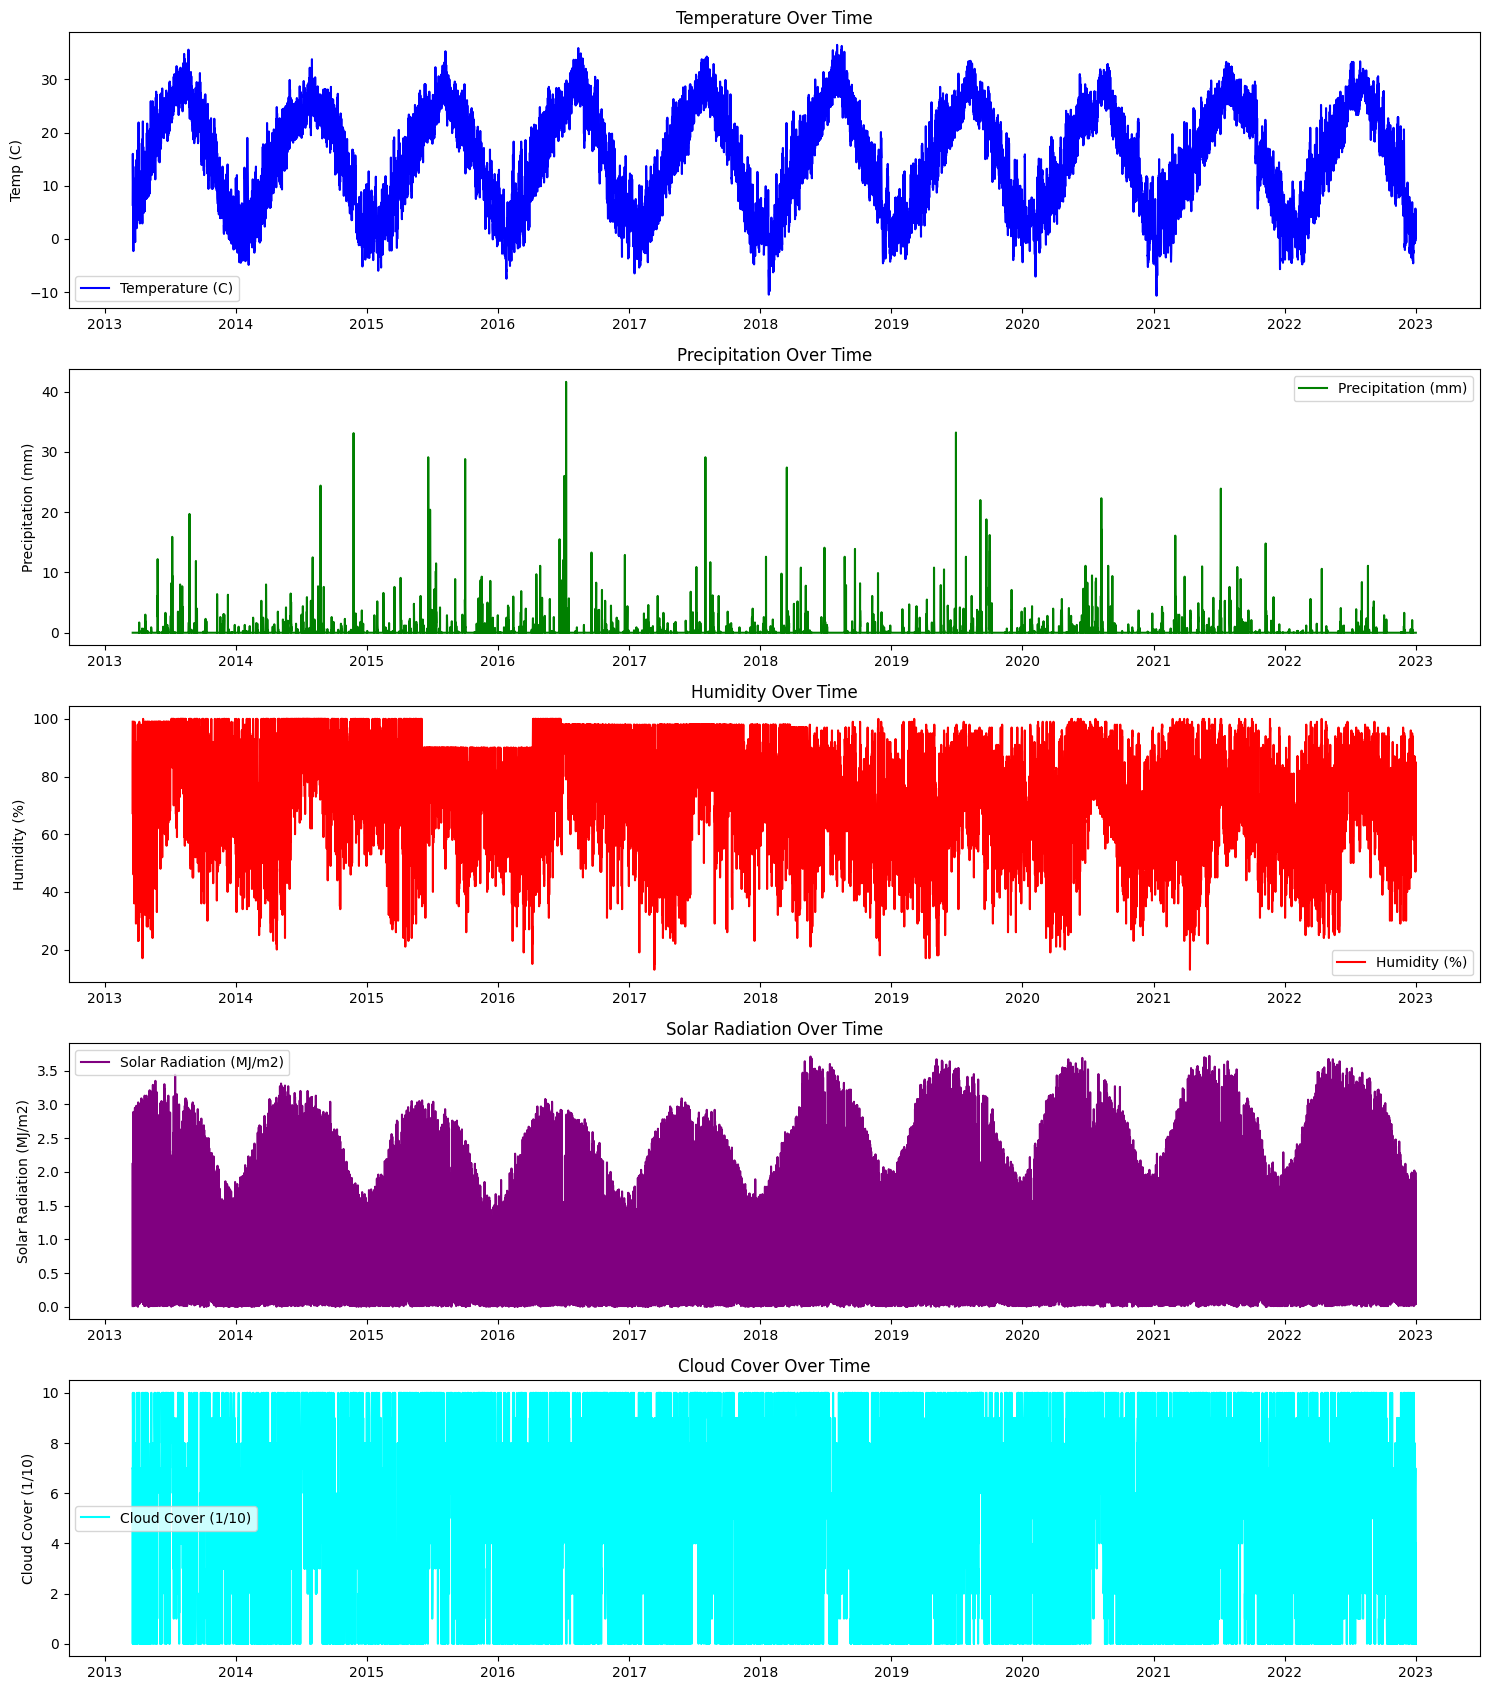

In [7]:
# Plotting meteorological variables over time (excluding Wind Speed)
fig, axs = plt.subplots(5, 1, figsize=(15, 17))

# Temperature
axs[0].plot(data['time'], data['Temp(C)'], color='blue', label='Temperature (C)')
axs[0].set_title('Temperature Over Time')
axs[0].set_ylabel('Temp (C)')
axs[0].legend()

# Precipitation
axs[1].plot(data['time'], data['Prec(mm)'], color='green', label='Precipitation (mm)')
axs[1].set_title('Precipitation Over Time')
axs[1].set_ylabel('Precipitation (mm)')
axs[1].legend()

# Humidity
axs[2].plot(data['time'], data['Humidity(%)'], color='red', label='Humidity (%)')
axs[2].set_title('Humidity Over Time')
axs[2].set_ylabel('Humidity (%)')
axs[2].legend()

# Solar Radiation
axs[3].plot(data['time'], data['Solar_Radiation(MJ/m2)'], color='purple', label='Solar Radiation (MJ/m2)')
axs[3].set_title('Solar Radiation Over Time')
axs[3].set_ylabel('Solar Radiation (MJ/m2)')
axs[3].legend()

# Cloud Cover
axs[4].plot(data['time'], data['Cloud_Cover(1/10)'], color='cyan', label='Cloud Cover (1/10)')
axs[4].set_title('Cloud Cover Over Time')
axs[4].set_ylabel('Cloud Cover (1/10)')
axs[4].legend()

plt.tight_layout()
plt.show()


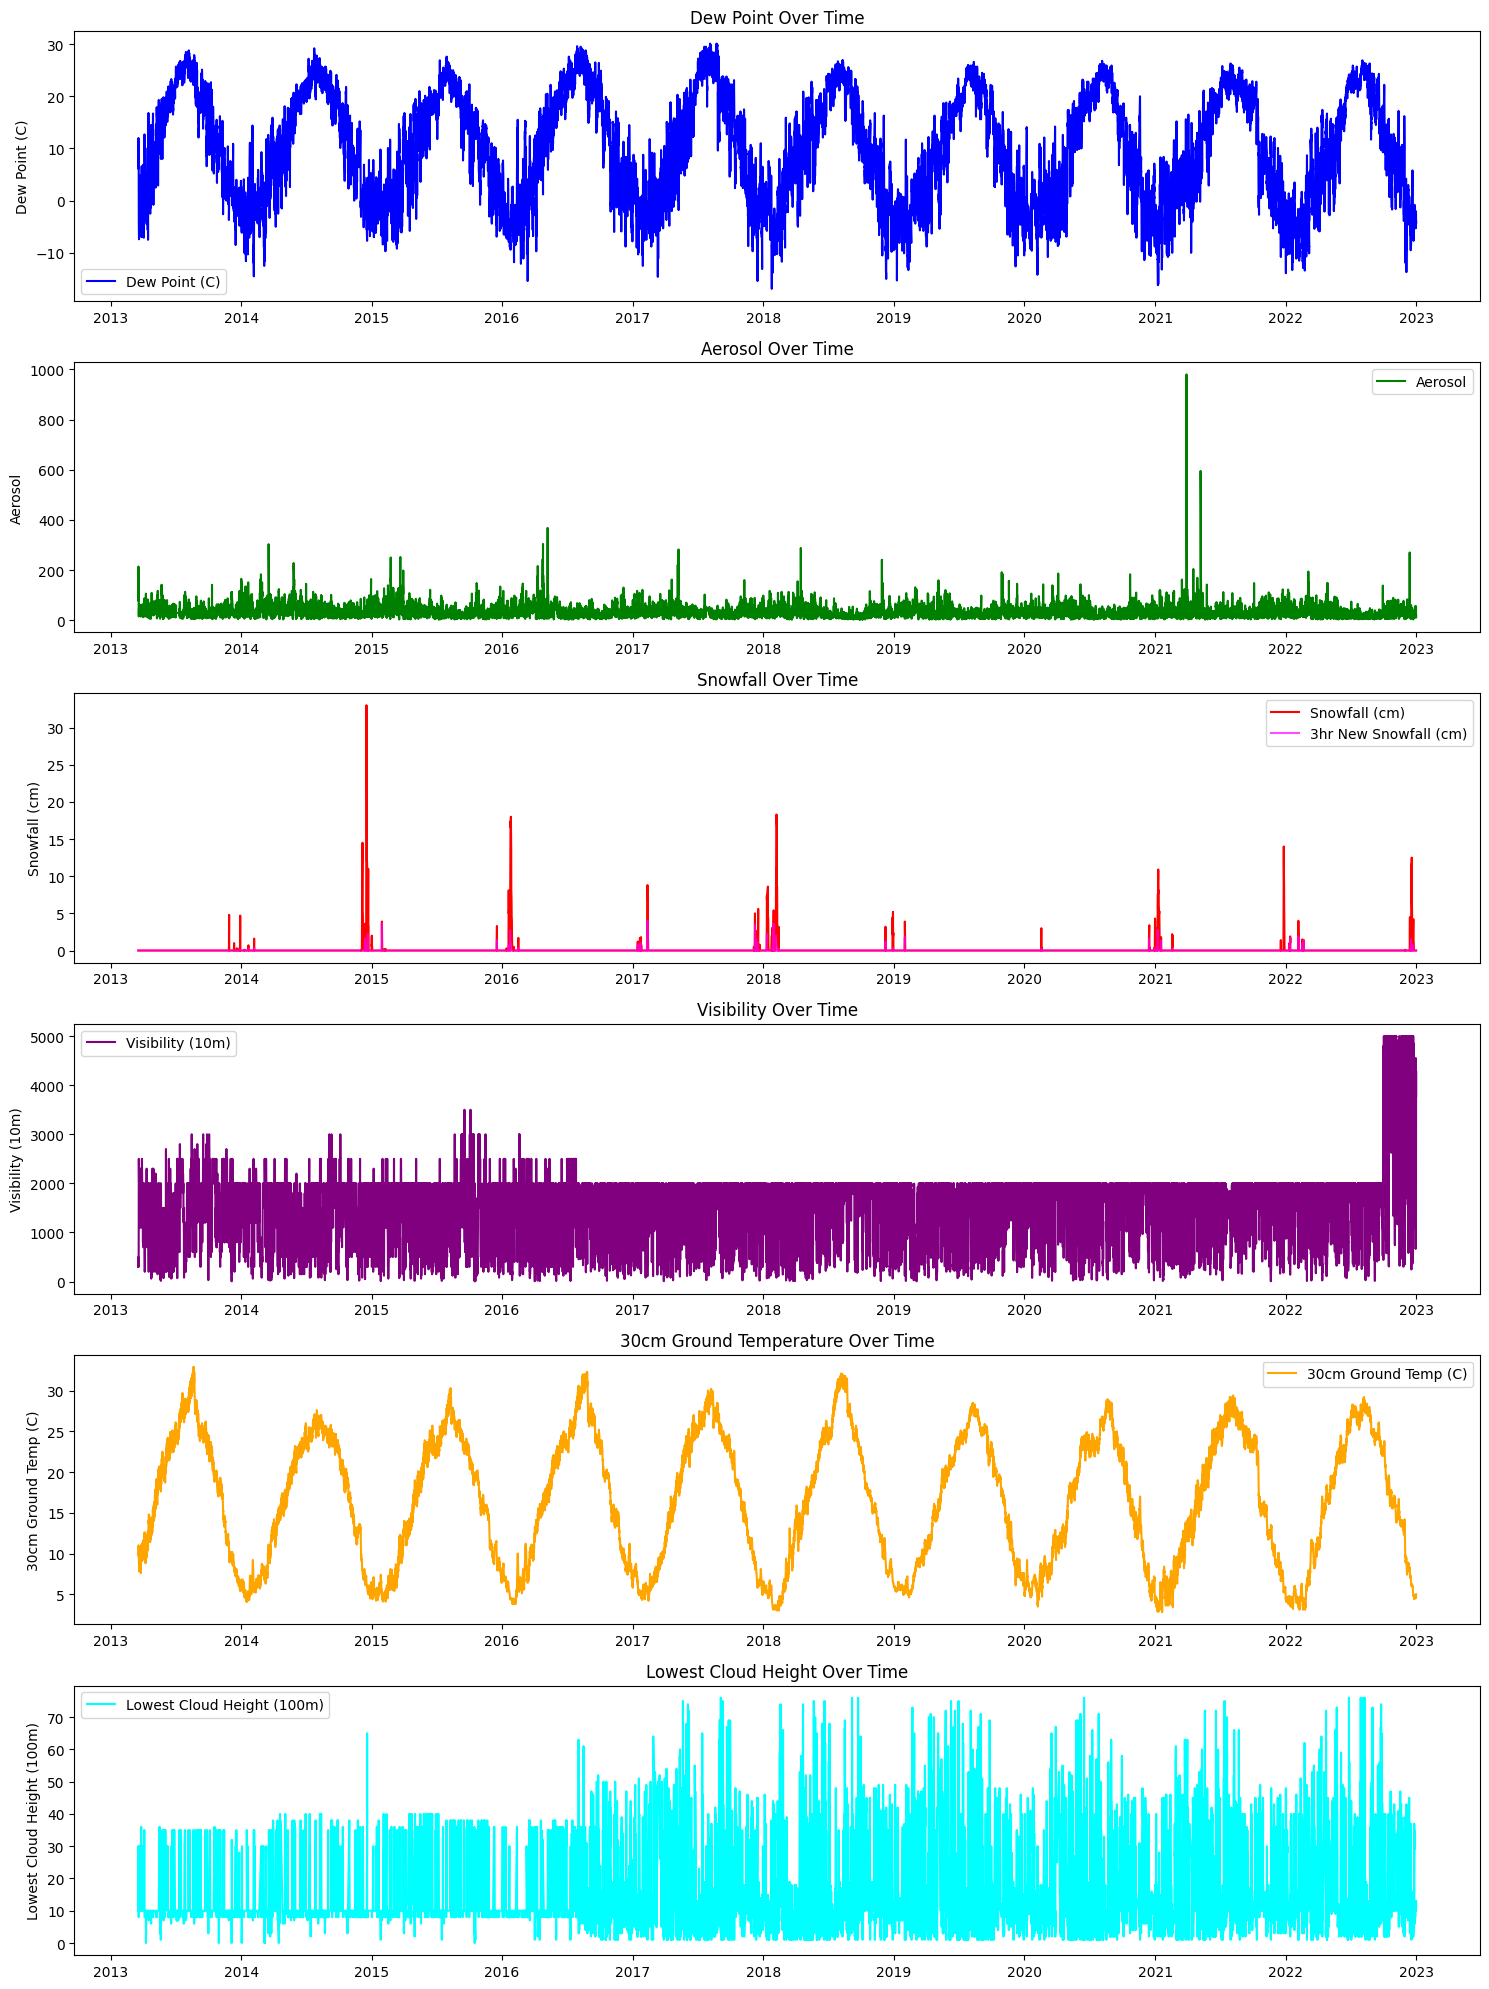

In [8]:
# Plotting derived or additional parameters over time
fig, axs = plt.subplots(6, 1, figsize=(15, 20))

# Dew Point
axs[0].plot(data['time'], data['Dew_Point(C)'], color='blue', label='Dew Point (C)')
axs[0].set_title('Dew Point Over Time')
axs[0].set_ylabel('Dew Point (C)')
axs[0].legend()

# Aerosol
axs[1].plot(data['time'], data['aerosol'], color='green', label='Aerosol')
axs[1].set_title('Aerosol Over Time')
axs[1].set_ylabel('Aerosol')
axs[1].legend()

# Snowfall
axs[2].plot(data['time'], data['Snowfall(cm)'], color='red', label='Snowfall (cm)')
axs[2].set_title('Snowfall Over Time')
axs[2].set_ylabel('Snowfall (cm)')
axs[2].legend()

# 3-hour New Snowfall
axs[2].plot(data['time'], data['3hr_New_Snowfall(cm)'], color='magenta', label='3hr New Snowfall (cm)', alpha=0.7)
axs[2].legend()

# Visibility
axs[3].plot(data['time'], data['Visibility(10m)'], color='purple', label='Visibility (10m)')
axs[3].set_title('Visibility Over Time')
axs[3].set_ylabel('Visibility (10m)')
axs[3].legend()

# Ground Temperature at 30cm
axs[4].plot(data['time'], data['30cm_Ground_Temperature(C)'], color='orange', label='30cm Ground Temp (C)')
axs[4].set_title('30cm Ground Temperature Over Time')
axs[4].set_ylabel('30cm Ground Temp (C)')
axs[4].legend()

# Lowest Cloud Height
axs[5].plot(data['time'], data['Lowest_Cloud_Height(100m)'], color='cyan', label='Lowest Cloud Height (100m)')
axs[5].set_title('Lowest Cloud Height Over Time')
axs[5].set_ylabel('Lowest Cloud Height (100m)')
axs[5].legend()

plt.tight_layout()
plt.show()

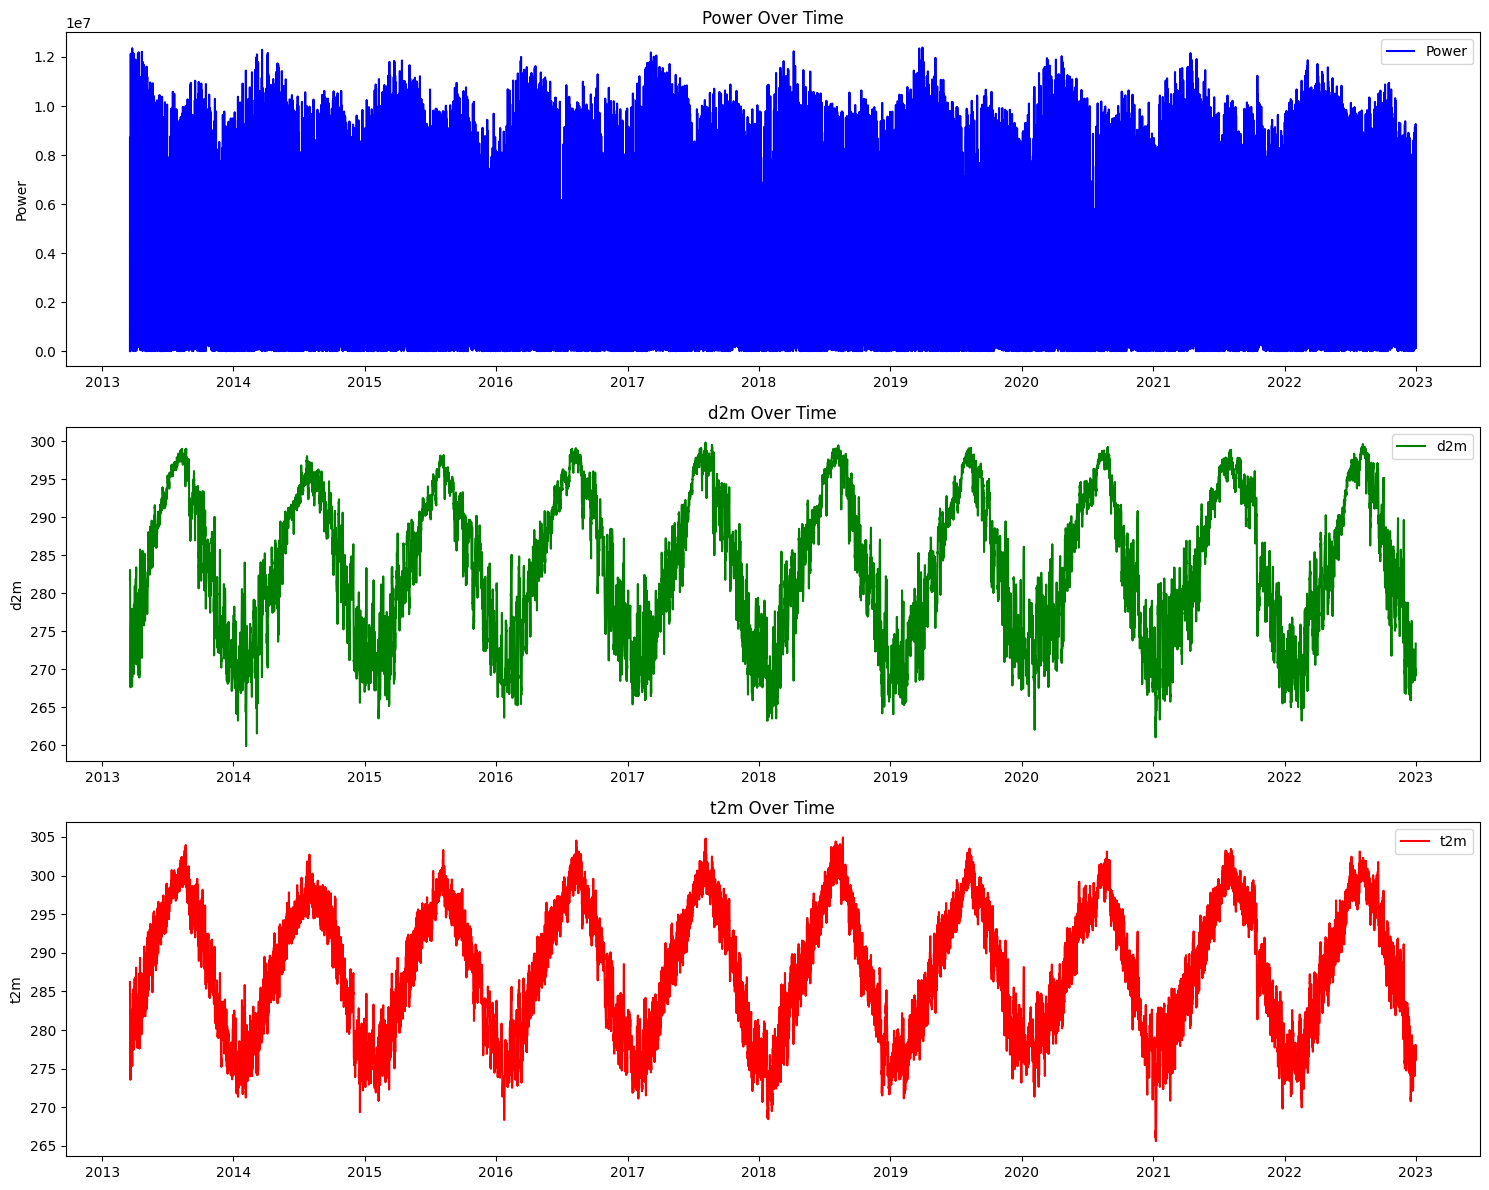

In [9]:
# Plotting power and related parameters over time
fig, axs = plt.subplots(3, 1, figsize=(15, 12))

# Power
axs[0].plot(data['time'], data['power'], color='blue', label='Power')
axs[0].set_title('Power Over Time')
axs[0].set_ylabel('Power')
axs[0].legend()

# d2m
axs[1].plot(data['time'], data['d2m'], color='green', label='d2m')
axs[1].set_title('d2m Over Time')
axs[1].set_ylabel('d2m')
axs[1].legend()

# t2m
axs[2].plot(data['time'], data['t2m'], color='red', label='t2m')
axs[2].set_title('t2m Over Time')
axs[2].set_ylabel('t2m')
axs[2].legend()

plt.tight_layout()
plt.show()

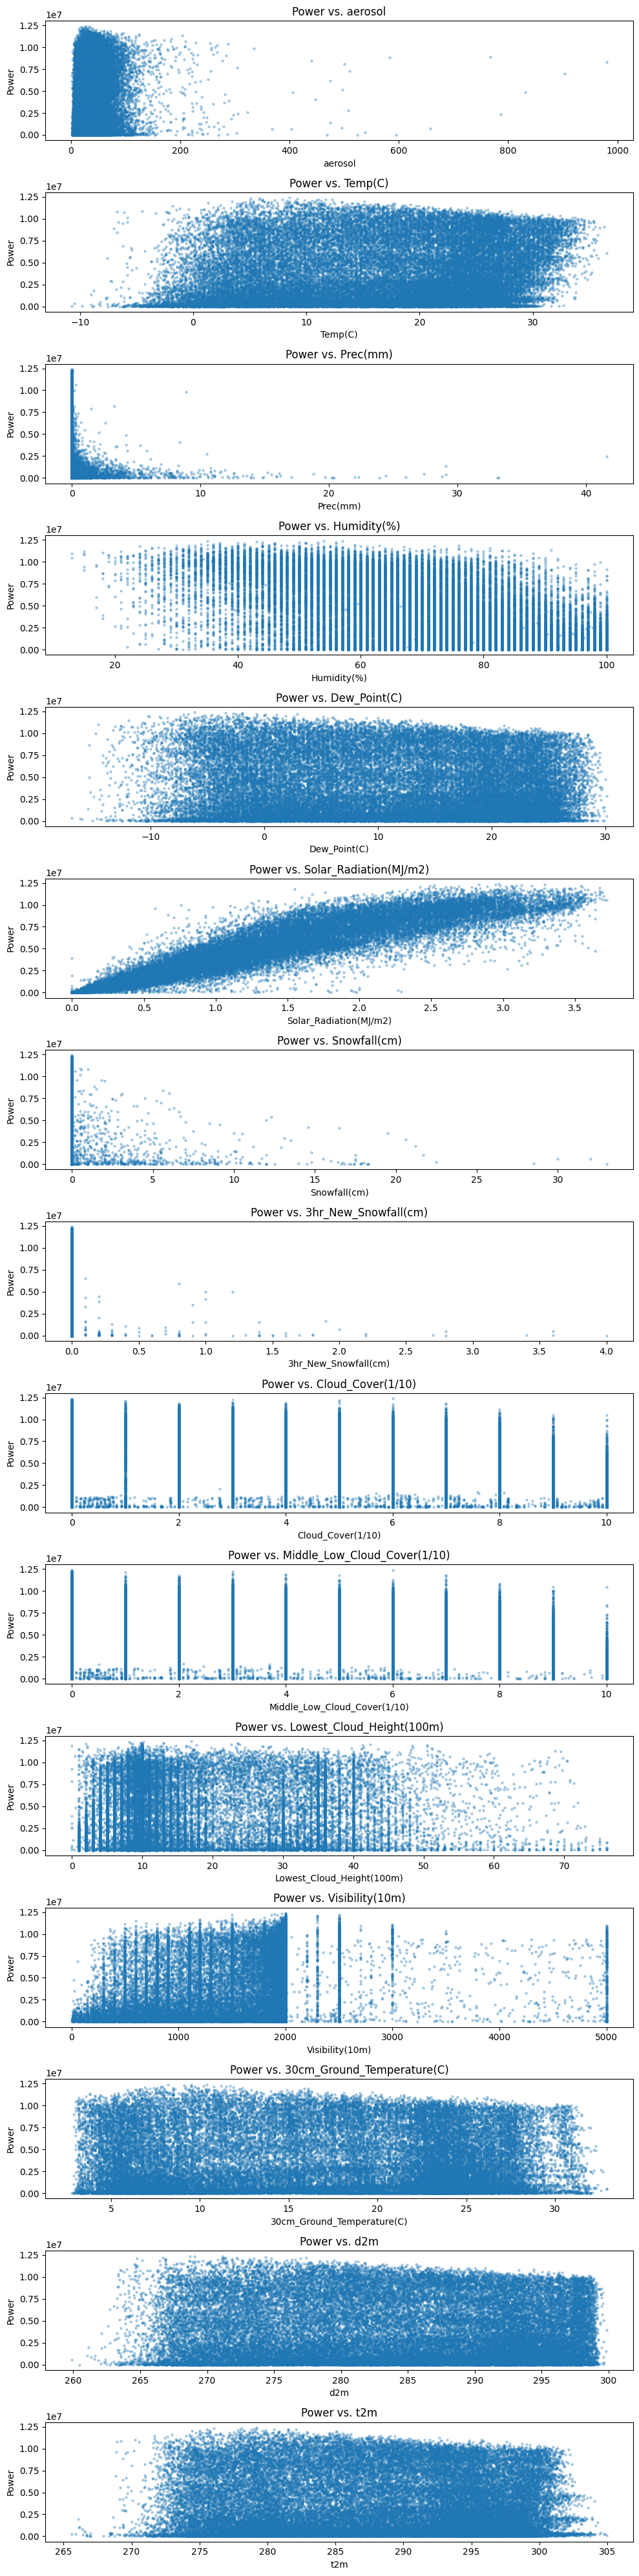

In [10]:
# List of relevant columns for scatter plots against power
columns_to_plot = [
    'aerosol', 'Temp(C)', 'Prec(mm)', 'Humidity(%)', 'Dew_Point(C)', 'Solar_Radiation(MJ/m2)',
    'Snowfall(cm)', '3hr_New_Snowfall(cm)', 'Cloud_Cover(1/10)', 'Middle_Low_Cloud_Cover(1/10)',
    'Lowest_Cloud_Height(100m)', 'Visibility(10m)', '30cm_Ground_Temperature(C)', 'd2m', 't2m'
]

fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(10, 40))

for i, col in enumerate(columns_to_plot):
    axs[i].scatter(data[col], data['power'], alpha=0.3, s=5)
    axs[i].set_title(f'Power vs. {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Power')

plt.tight_layout()
plt.show()

In [11]:
# Calculate the correlation coefficients between power and the relevant columns
correlation_with_power = data[columns_to_plot + ['power']].corr()['power'].drop('power')

correlation_with_power.sort_values(ascending=False)

Solar_Radiation(MJ/m2)          0.934074
Visibility(10m)                 0.242194
Temp(C)                         0.148194
aerosol                         0.147385
Lowest_Cloud_Height(100m)       0.090322
3hr_New_Snowfall(cm)           -0.034126
30cm_Ground_Temperature(C)     -0.035160
t2m                            -0.047232
d2m                            -0.048600
Snowfall(cm)                   -0.073019
Dew_Point(C)                   -0.096328
Prec(mm)                       -0.119243
Middle_Low_Cloud_Cover(1/10)   -0.360697
Cloud_Cover(1/10)              -0.435945
Humidity(%)                    -0.571279
Name: power, dtype: float64

In [12]:
# Feature Engineering

# Create a new feature for the difference between Temp(C) and Dew_Point(C)
data['Temp_Dew_Point_Diff'] = data['Temp(C)'] - data['Dew_Point(C)']


# Display the first few rows to check the new features
data[['Temp_Dew_Point_Diff']].head()


Temp_Dew_Point_Diff
0                  0.2
1                  0.7
2                  1.6
3                  3.6
4                  4.6

In [14]:
# Compute pairwise correlation coefficients
correlation_matrix = data.drop(columns=['year', 'day', 'hour']).corr()

# Extract pairs with high correlation (greater than 0.8 or less than -0.8), excluding self-correlations
high_correlations = correlation_matrix.unstack()
high_correlations = high_correlations[(abs(high_correlations) > 0.8) & (abs(high_correlations) < 1.0)]
high_correlations_sorted = high_correlations.sort_values(kind="quicksort", key=lambda x: -abs(x))

high_correlations_sorted

Temp_Dew_Point_Diff         Humidity(%)                  -0.980359
Humidity(%)                 Temp_Dew_Point_Diff          -0.980359
d2m                         t2m                           0.971807
t2m                         d2m                           0.971807
                            30cm_Ground_Temperature(C)    0.959710
30cm_Ground_Temperature(C)  t2m                           0.959710
d2m                         Dew_Point(C)                  0.954799
Dew_Point(C)                d2m                           0.954799
Temp(C)                     d2m                           0.942850
d2m                         Temp(C)                       0.942850
                            30cm_Ground_Temperature(C)    0.942460
30cm_Ground_Temperature(C)  d2m                           0.942460
Temp(C)                     30cm_Ground_Temperature(C)    0.934796
30cm_Ground_Temperature(C)  Temp(C)                       0.934796
Solar_Radiation(MJ/m2)      power                         0.93

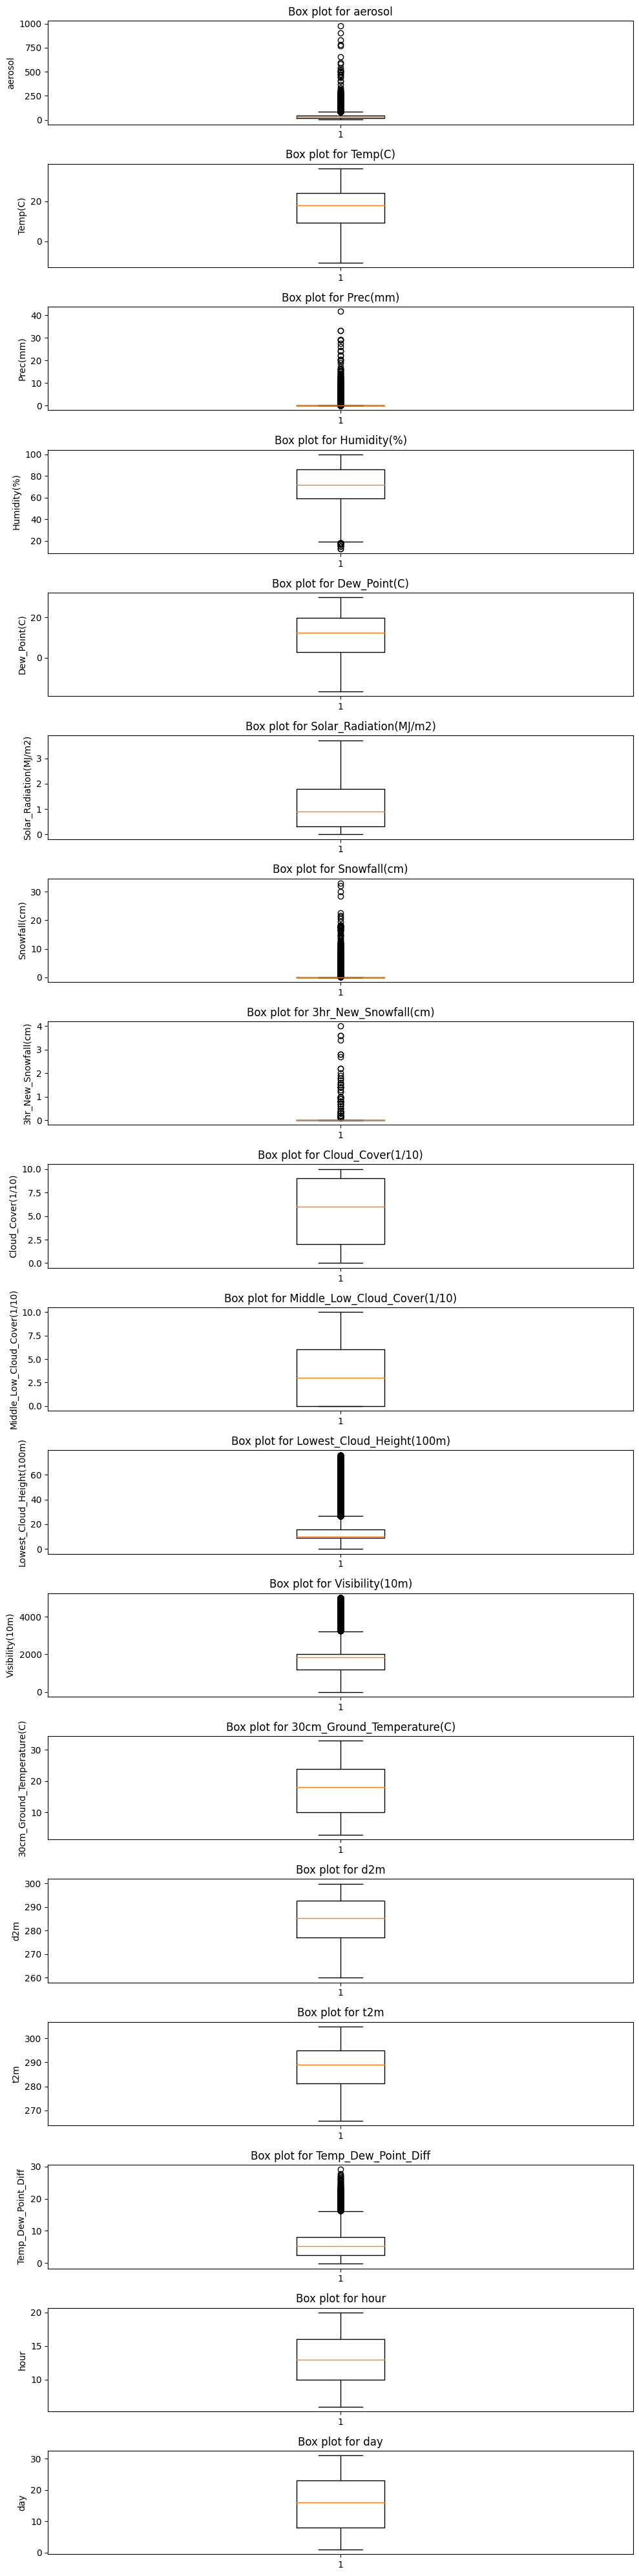

In [16]:
# Plotting box plots for each variable to detect outliers

# Selecting relevant columns for box plots
cols_for_boxplots = columns_to_plot + ['Temp_Dew_Point_Diff', 'hour', 'day']

fig, axs = plt.subplots(len(cols_for_boxplots), 1, figsize=(10, 40))

for i, col in enumerate(cols_for_boxplots):
    axs[i].boxplot(data[col])
    axs[i].set_title(f'Box plot for {col}')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

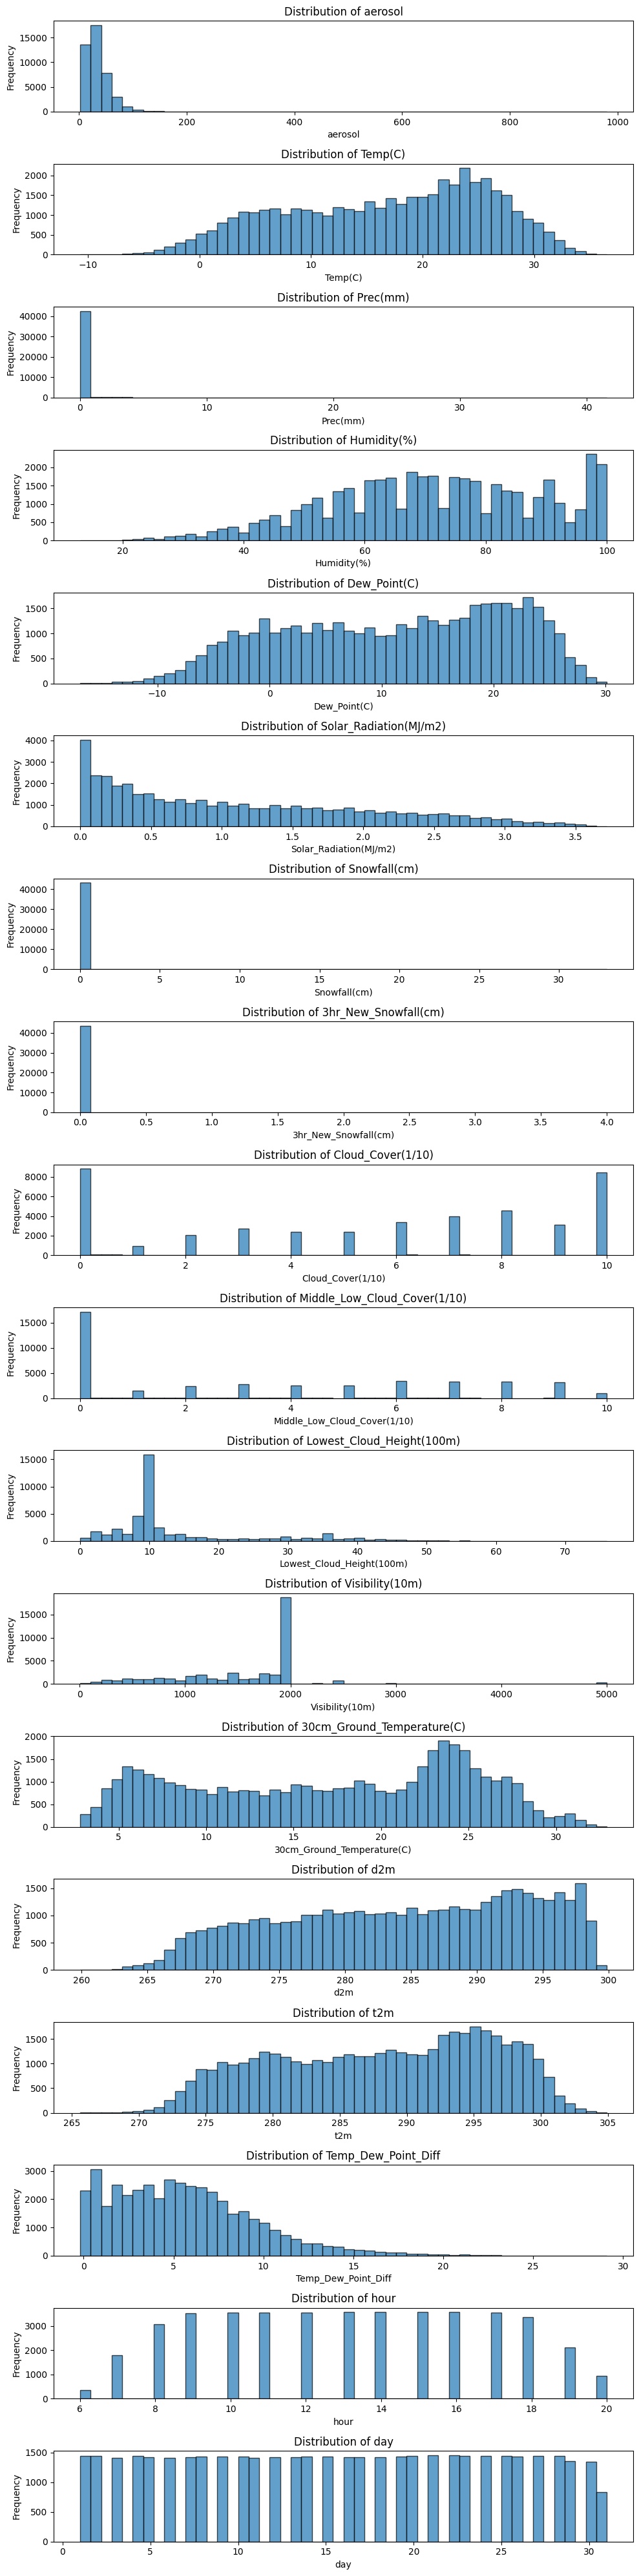

In [17]:
# Plotting histograms for each variable to check their distribution

fig, axs = plt.subplots(len(cols_for_boxplots), 1, figsize=(10, 40))

for i, col in enumerate(cols_for_boxplots):
    axs[i].hist(data[col], bins=50, edgecolor='black', alpha=0.7)
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Variables with significant skewness like Aerosol, Precipitation, and Snowfall might benefit from transformations like logarithmic or square root transformations to make their distribution more normal.

In [20]:
#feature importance
from sklearn.ensemble import RandomForestRegressor

# Preparing the data
X = data[cols_for_boxplots]
y = data['power']

# Training a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extracting feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_importances


Solar_Radiation(MJ/m2)          0.893483
t2m                             0.019544
hour                            0.018206
d2m                             0.013085
Cloud_Cover(1/10)               0.009744
Snowfall(cm)                    0.006897
aerosol                         0.005030
30cm_Ground_Temperature(C)      0.004934
Temp(C)                         0.004780
Dew_Point(C)                    0.004065
Visibility(10m)                 0.004037
day                             0.003912
Lowest_Cloud_Height(100m)       0.003454
Middle_Low_Cloud_Cover(1/10)    0.003175
Temp_Dew_Point_Diff             0.003018
Humidity(%)                     0.002336
Prec(mm)                        0.000269
3hr_New_Snowfall(cm)            0.000032
dtype: float64

In [21]:
import numpy as np

# List of columns to transform
cols_to_transform = ['aerosol', 'Prec(mm)', 'Snowfall(cm)']

# Apply transformations
for col in cols_to_transform:
    data[f'log_{col}'] = np.log1p(data[col])

# Display the transformed data
data[['log_aerosol', 'log_Prec(mm)', 'log_Snowfall(cm)']].head()

log_aerosol  log_Prec(mm)  log_Snowfall(cm)
0     4.634729           0.0               0.0
1     4.691348           0.0               0.0
2     4.615121           0.0               0.0
3     4.553877           0.0               0.0
4     4.394449           0.0               0.0

In [22]:
# Creating a new feature for the difference between t2m and d2m
data['t2m_d2m_diff'] = data['t2m'] - data['d2m']

# Display the new feature and confirm the removal of month column
data[['t2m_d2m_diff']].head()


t2m_d2m_diff
0       4.40911
1       3.99851
2       3.60202
3       2.10849
4       1.92223

In [23]:
# Capping outliers based on 1st and 99th percentiles for selected variables

cols_to_cap = ['aerosol', 'Temp(C)', 'Dew_Point(C)', '30cm_Ground_Temperature(C)', 'Lowest_Cloud_Height(100m)', 'Visibility(10m)']

for col in cols_to_cap:
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)

# Display the data to check capped values
data[cols_to_cap].describe()

aerosol       Temp(C)  Dew_Point(C)  30cm_Ground_Temperature(C)   
count  43698.000000  43698.000000  43698.000000                43698.000000  \
mean      34.529817     16.821145     11.207474                   17.103952   
std       21.720159      8.995651      9.935960                    7.689791   
min        5.000000     -2.300000     -9.100000                    3.700000   
25%       19.000000      9.400000      2.700000                   10.000000   
50%       30.000000     18.100000     12.300000                   18.000000   
75%       44.854396     24.275000     19.900000                   23.800000   
max      118.000000     32.300000     27.400000                   30.600000   

       Lowest_Cloud_Height(100m)  Visibility(10m)  
count               43698.000000     43698.000000  
mean                   14.728376      1595.114835  
std                    11.404535       653.756976  
min                     1.000000       160.000000  
25%                     9.000000      1182.250000  
50%                    10.000000      1849.000000  
75%                    16.000000      2000.000000  
max                    54.000000      4347.180000

In [27]:

# Lagged values for power generation (1, 2, and 3 hours ago)
data['power_lag_1'] = data['power'].shift(1)
data['power_lag_2'] = data['power'].shift(2)
data['power_lag_3'] = data['power'].shift(3)

# Rolling statistics (using a window of 24 hours as an example)
data['power_rolling_mean_24'] = data['power'].rolling(window=24).mean()
data['power_rolling_std_24'] = data['power'].rolling(window=24).std()

# Time-based features
data['day_of_week'] = data['time'].dt.dayofweek
data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)  # 5 and 6 correspond to Saturday and Sunday

# Interaction terms
data['Temp_Humidity_Interaction'] = data['Temp(C)'] * data['Dew_Point(C)']
# Creating the interaction term for Visibility(10m) and Cloud_Cover(1/10)
data['Visibility_Cloud_Interaction'] = data['Visibility(10m)'] * data['Cloud_Cover(1/10)']

# Drop any rows with NaN values resulting from the lag and rolling features
data.dropna(inplace=True)

data.head()

aerosol  year  month  day  hour  Temp(C)  Prec(mm)  Humidity(%)   
23     22.0  2013      3   20    17      3.9       0.0         72.0  \
24     33.0  2013      3   20    18      2.1       0.0         69.0   
25     40.0  2013      3   20    19      0.7       0.0         68.0   
26     48.0  2013      3   21     7     -2.3       0.0         72.0   
27     38.0  2013      3   21     8     -0.6       0.0         60.0   

    Dew_Point(C)  Solar_Radiation(MJ/m2)  Snowfall(cm)  3hr_New_Snowfall(cm)   
23          -0.6                    1.40           0.0                   0.0  \
24          -3.0                    0.66           0.0                   0.0   
25          -4.5                    0.07           0.0                   0.0   
26          -6.6                    0.01           0.0                   0.0   
27          -7.4                    0.40           0.0                   0.0   

    Cloud_Cover(1/10)  Middle_Low_Cloud_Cover(1/10)   
23           0.000000                      0.000000  \
24           1.000000                      1.000000   
25           0.923077                      0.923077   
26           0.000000                      0.000000   
27           0.000000                      0.000000   

    Lowest_Cloud_Height(100m)  Visibility(10m)  30cm_Ground_Temperature(C)   
23                       10.0      2500.000000                        10.4  \
24                       10.0      2500.000000                        10.4   
25                       10.0      2461.538462                        10.3   
26                       10.0      2000.000000                         8.3   
27                       10.0      2000.000000                         8.1   

        power        d2m        t2m                time  Temp_Dew_Point_Diff   
23  5356800.0  267.97684  273.97412 2013-03-20 17:00:00                  4.5  \
24  2726400.0  267.81885  273.76404 2013-03-20 18:00:00                  5.1   
25   201600.0  267.64540  273.56427 2013-03-20 19:00:00                  5.2   
26    28800.0  268.66763  279.48187 2013-03-21 07:00:00                  4.3   
27  1468800.0  269.65826  279.11100 2013-03-21 08:00:00                  6.8   

    log_aerosol  log_Prec(mm)  log_Snowfall(cm)  t2m_d2m_diff  power_lag_1   
23     3.135494           0.0               0.0       5.99728    4492800.0  \
24     3.526361           0.0               0.0       5.94519    5356800.0   
25     3.713572           0.0               0.0       5.91887    2726400.0   
26     3.891820           0.0               0.0      10.81424     201600.0   
27     3.663562           0.0               0.0       9.45274      28800.0   

    power_lag_2  power_lag_3  power_rolling_mean_24  power_rolling_std_24   
23    4684800.0    4742400.0              3204400.0          2.686564e+06  \
24    4492800.0    4684800.0              3317600.0          2.602003e+06   
25    5356800.0    4492800.0              3292000.0          2.630551e+06   
26    2726400.0    5356800.0              3172400.0          2.713142e+06   
27     201600.0    2726400.0              3005600.0          2.688563e+06   

    day_of_week  is_weekend  Temp_Humidity_Interaction   
23            2           0                      -2.34  \
24            2           0                      -6.30   
25            2           0                      -3.15   
26            3           0                      15.18   
27            3           0                       4.44   

    Visibility_Cloud_Interaction  
23                      0.000000  
24                   2500.000000  
25                   2272.189349  
26                      0.000000  
27                      0.000000

In [28]:
data.to_csv('done_preprocessing.csv', index=False)

In [30]:
import numpy as np
import itertools
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load your dataset as new_son
# new_son = ...

# Selecting features and target
X = data.drop(columns=['power', 'time'])
y = data['power']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter grid
config = [[True, False], [16, 32, 64, 128], [8, 16, 32]]
additional_layer, n_neurons, n_batch_size = config
possible_combinations = list(itertools.product(additional_layer, n_neurons, n_batch_size))

# Initialize lists to store results
validation_loss = np.zeros((5, len(possible_combinations)))

print('Possible combinations: ', len(possible_combinations))
print('\n')

Possible combinations:  24




In [31]:
k = 5
kfold = KFold(n_splits=k, shuffle=True)

for i, (add_layer, neurons, batch_size) in enumerate(possible_combinations):
    print('--------------------------------------------------------------------')
    print(f'{i+1}th combination:')
    print('Additional Layer:', add_layer)
    print('Neurons:', neurons)
    print('Batch Size:', batch_size)
    
    val_loss = []
    train_loss = []
    
    for train_index, val_index in kfold.split(X_train_scaled):
        fold_train_X = X_train_scaled[train_index]
        fold_val_X = X_train_scaled[val_index]
        fold_train_y = y_train.iloc[train_index].values
        fold_val_y = y_train.iloc[val_index].values

        fold_train_X2 = fold_train_X.reshape((fold_train_X.shape[0], 1, fold_train_X.shape[1]))
        fold_val_X2 = fold_val_X.reshape((fold_val_X.shape[0], 1, fold_val_X.shape[1]))

        es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20)

        model = Sequential()
        model.add(GRU(units=neurons, return_sequences=True, input_shape=(1, X_train.shape[1])))
        model.add(Dropout(0.2))

        if add_layer:
            model.add(GRU(units=neurons, return_sequences=True))
            model.add(Dropout(0.2))

        model.add(GRU(units=neurons, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(GRU(units=neurons, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(GRU(units=neurons, return_sequences=False))
        model.add(Dropout(0.2))
        model.add(Dense(units=1, activation='tanh'))
        model.compile(optimizer='adam', loss='mse', metrics=['mse'])

        model.fit(fold_train_X2, fold_train_y, epochs=100, verbose=0, batch_size=batch_size, callbacks=[es], shuffle=False)

        train_mse = model.evaluate(fold_train_X2, fold_train_y, verbose=0)[0]
        val_mse = model.evaluate(fold_val_X2, fold_val_y, verbose=0)[0]

        train_loss.append(train_mse)
        val_loss.append(val_mse)

    print(f'Mean Train MSE: {np.mean(train_loss)}     Mean Validation MSE: {np.mean(val_loss)}\n')


--------------------------------------------------------------------
1th combination:
Additional Layer: True
Neurons: 16
Batch Size: 8
Epoch 21: early stopping
Epoch 21: early stopping
Epoch 21: early stopping
Epoch 21: early stopping
Epoch 21: early stopping
Mean Train MSE: 27877721296076.8     Mean Validation MSE: 27877724651520.0

--------------------------------------------------------------------
2th combination:
Additional Layer: True
Neurons: 16
Batch Size: 16
Epoch 21: early stopping
Epoch 21: early stopping
Epoch 21: early stopping
Epoch 21: early stopping
Epoch 21: early stopping
Mean Train MSE: 27877725490380.8     Mean Validation MSE: 27877722973798.4

--------------------------------------------------------------------
3th combination:
Additional Layer: True
Neurons: 16
Batch Size: 32
Epoch 21: early stopping
Epoch 21: early stopping
Epoch 21: early stopping
Epoch 21: early stopping
Epoch 21: early stopping
Mean Train MSE: 27877716682342.4     Mean Validation MSE: 27877722

KeyboardInterrupt: 